In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import json
from fim import apriori, fpgrowth, eclat # it's PyFIM - https://borgelt.net/pyfim.html
import matplotlib.pyplot as plt
import time

# Data preprocessing

In [2]:
# stage 1
orders = pd.read_csv('./instacart-market-basket-analysis/order_products__prior.csv')[['order_id','product_id']]
orders.to_csv('instacart_order.csv', index=False)

In [3]:
# stage 2
orders = pd.read_csv('instacart_order.csv')

In [4]:
# stage 3
orders = orders.groupby('order_id')['product_id'].apply(list) #.to_csv('instacart_transact_list.csv', index=False)

In [5]:
# stage 4 Save list as JSON
orders_list = orders.values.tolist()

with open("instacart_transact_list.txt", "w") as fp:
   json.dump(orders_list, fp)

In [6]:
# stage 5
with open("instacart_transact_list.txt", "r") as fp:
   trns_list = json.load(fp)

products = pd.read_csv('./instacart-market-basket-analysis/products.csv')[['product_id','product_name']]
products.set_index('product_id', inplace=True)

productsArr = products.values

for x in range(len(trns_list)):
   for y in range(len(trns_list[x])):
       index = trns_list[x][y] - 1
       value = productsArr[index][0]
       trns_list[x][y] = value

with open("input.txt", "w") as fp:
   json.dump(trns_list, fp)

## Load the saved data

In [7]:
with open("input.txt", "r") as fp:
    transactions = json.load(fp)

In [8]:
transactions

[['Organic Egg Whites',
  'Michigan Organic Kale',
  'Garlic Powder',
  'Coconut Butter',
  'Natural Sweetener',
  'Carrots',
  'Original Unflavored Gelatine Mix',
  'All Natural No Stir Creamy Almond Butter',
  'Classic Blend Cole Slaw'],
 ['Total 2% with Strawberry Lowfat Greek Strained Yogurt',
  'Unsweetened Almondmilk',
  'Lemons',
  'Organic Baby Spinach',
  'Unsweetened Chocolate Almond Breeze Almond Milk',
  'Organic Ginger Root',
  'Air Chilled Organic Boneless Skinless Chicken Breasts',
  'Organic Ezekiel 49 Bread Cinnamon Raisin'],
 ['Plain Pre-Sliced Bagels',
  'Honey/Lemon Cough Drops',
  'Chewy 25% Low Sugar Chocolate Chip Granola',
  'Oats & Chocolate Chewy Bars',
  "Kellogg's Nutri-Grain Apple Cinnamon Cereal",
  'Nutri-Grain Soft Baked Strawberry Cereal Breakfast Bars',
  "Kellogg's Nutri-Grain Blueberry Cereal",
  'Tiny Twists Pretzels',
  'Traditional Snack Mix',
  'Goldfish Cheddar Baked Snack Crackers',
  'Original Orange Juice',
  'Sugarfree Energy Drink',
  'Ener

In [9]:
len(transactions)

3214874

In [10]:
pd.set_option("max_colwidth", 150)

In [11]:
# Results should be equivalent
support = 0.3
confidence = 70 # don't need here 
target = 'all' # maximal
zmin = 2

# Apriori

In [12]:
start = time.perf_counter()
fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end = time.perf_counter()
print(end-start)

12.09937933099991


In [13]:
df_apriori = pd.DataFrame.from_records(fi_apriori).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_apriori

,0,1
0,"(Organic Hass Avocado, Bag of Organic Bananas)",62341
1,"(Organic Strawberries, Bag of Organic Bananas)",61628
2,"(Organic Strawberries, Banana)",56156
3,"(Organic Avocado, Banana)",53395
4,"(Organic Baby Spinach, Banana)",51395
...,...,...
270,"(Organic Peeled Whole Baby Carrots, Organic Strawberries)",9714
271,"(Cucumber Kirby, Bag of Organic Bananas)",9713
272,"(Organic Blueberries, Strawberries)",9709
273,"(Organic Whole Milk, Large Lemon)",9701


# FP-Growth

In [14]:
start = time.perf_counter()
fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end = time.perf_counter()
print(end-start)

13.012616337000054


In [15]:
df_fpgrowth = pd.DataFrame.from_records(fi_fpgrowth).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_fpgrowth

,0,1
0,"(Organic Hass Avocado, Bag of Organic Bananas)",62341
1,"(Organic Strawberries, Bag of Organic Bananas)",61628
2,"(Organic Strawberries, Banana)",56156
3,"(Organic Avocado, Banana)",53395
4,"(Organic Baby Spinach, Banana)",51395
...,...,...
270,"(Organic Peeled Whole Baby Carrots, Organic Strawberries)",9714
271,"(Cucumber Kirby, Bag of Organic Bananas)",9713
272,"(Organic Blueberries, Strawberries)",9709
273,"(Organic Whole Milk, Large Lemon)",9701


# ECLAT

In [16]:
start = time.perf_counter()
fi_eclat = eclat(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end = time.perf_counter()
print(end-start)

11.600039081999967


In [17]:
df_fi_eclat = pd.DataFrame.from_records(fi_eclat).sort_values(by=[1],ascending=False).reset_index(drop=True)
df_fi_eclat

,0,1
0,"(Organic Hass Avocado, Bag of Organic Bananas)",62341
1,"(Organic Strawberries, Bag of Organic Bananas)",61628
2,"(Organic Strawberries, Banana)",56156
3,"(Organic Avocado, Banana)",53395
4,"(Organic Baby Spinach, Banana)",51395
...,...,...
270,"(Organic Peeled Whole Baby Carrots, Organic Strawberries)",9714
271,"(Cucumber Kirby, Bag of Organic Bananas)",9713
272,"(Organic Blueberries, Strawberries)",9709
273,"(Organic Whole Milk, Large Lemon)",9701


In [18]:
df_fi_eclat.values.tolist()

[[('Organic Hass Avocado', 'Bag of Organic Bananas'), 62341],
 [('Organic Strawberries', 'Bag of Organic Bananas'), 61628],
 [('Organic Strawberries', 'Banana'), 56156],
 [('Organic Avocado', 'Banana'), 53395],
 [('Organic Baby Spinach', 'Banana'), 51395],
 [('Organic Baby Spinach', 'Bag of Organic Bananas'), 50372],
 [('Strawberries', 'Banana'), 41232],
 [('Large Lemon', 'Banana'), 40880],
 [('Organic Hass Avocado', 'Organic Strawberries'), 40794],
 [('Organic Raspberries', 'Bag of Organic Bananas'), 40503],
 [('Organic Baby Spinach', 'Organic Strawberries'), 38134],
 [('Organic Hass Avocado', 'Organic Baby Spinach'), 34901],
 [('Organic Fuji Apple', 'Banana'), 33943],
 [('Organic Raspberries', 'Organic Strawberries'), 33863],
 [('Cucumber Kirby', 'Banana'), 32097],
 [('Limes', 'Banana'), 31772],
 [('Organic Whole Milk', 'Banana'), 31641],
 [('Organic Hass Avocado', 'Banana'), 31222],
 [('Organic Avocado', 'Organic Baby Spinach'), 30889],
 [('Honeycrisp Apple', 'Banana'), 28408],
 [('

In [19]:
df_fi_eclat.values.tolist()[0]

[('Organic Hass Avocado', 'Bag of Organic Bananas'), 62341]

In [20]:
df_fi_eclat.values.tolist()[-1]

[('Organic Cilantro', 'Organic Avocado'), 9663]

# Fixed data set, changeable support threshold

In [21]:
supps = [0.005, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]

a = []
fp = []
e = []

fi_fpgrowth = []

fr_it_set_size = []          # 2
fi_it_set_max_len = []       # 3
num_of_unique_fr_it_set = [] # 4

In [22]:
for supp in supps:
    start_a = time.perf_counter()
    fi_apriori = apriori(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_a = time.perf_counter()
    
    start_fp = time.perf_counter()
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_fp = time.perf_counter()
    
    ####
    
    fr_it_set_size.append(len(fi_fpgrowth))
    
    size=[0,]
    for i in range(len(fi_fpgrowth)):
        size.append(len(fi_fpgrowth[i][0]))
    fi_it_set_max_len.append(max(size))
    
    size=[]
    for i in range(len(fi_fpgrowth)):
        size.append(len(fi_fpgrowth[i][0]))     
    num_of_unique_fr_it_set.append(len(set(size)))
    
    ####
    
    start_e = time.perf_counter()
    fi_e = eclat(tracts=transactions, target=target, supp=supp, conf=confidence, zmin=zmin)
    end_e = time.perf_counter()
    
    a.append(end_a-start_a)
    fp.append(end_fp-start_fp)
    e.append(end_e-start_e)

### 1. Comparison of algorithm performance

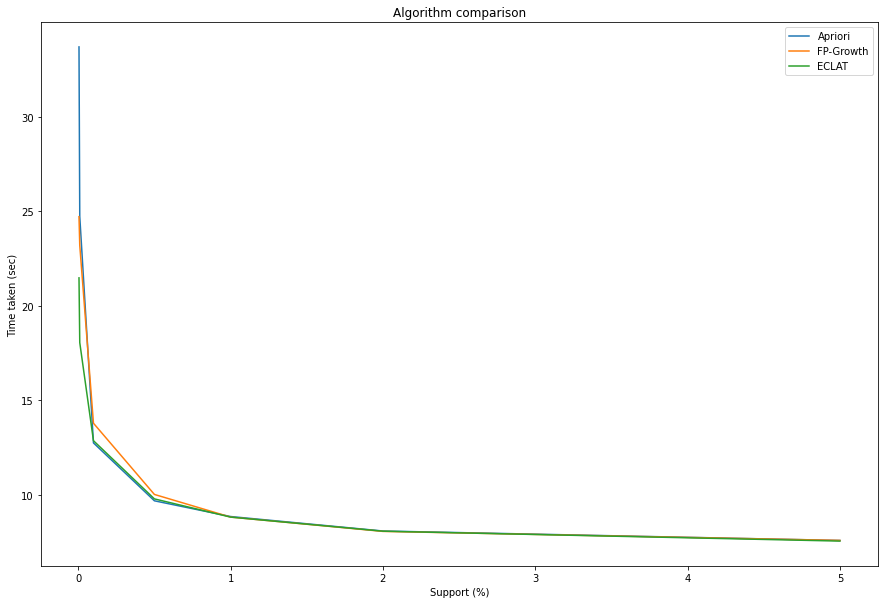

In [23]:
plt.plot(supps, a, label = "Apriori")
plt.plot(supps, fp, label = "FP-Growth")
plt.plot(supps, e, label = "ECLAT")

plt.xlabel('Support (%)')
plt.ylabel('Time taken (sec)')
plt.title('Algorithm comparison')
plt.legend(loc='best')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [24]:
print("Apriori:    FP-Growth:   ECLAT:")
for i in range(len(a)):
    print( "{:7.2f} {:13.2f} {:8.2f}".format(a[i],fp[i],e[i]) )

Apriori:    FP-Growth:   ECLAT:
  33.69         24.71    21.47
  24.72         23.19    18.05
  12.74         13.78    12.86
   9.68         10.02     9.78
   8.85          8.82     8.82
   8.08          8.06     8.07
   7.58          7.59     7.55


### 2. Total number of frequent feature sets

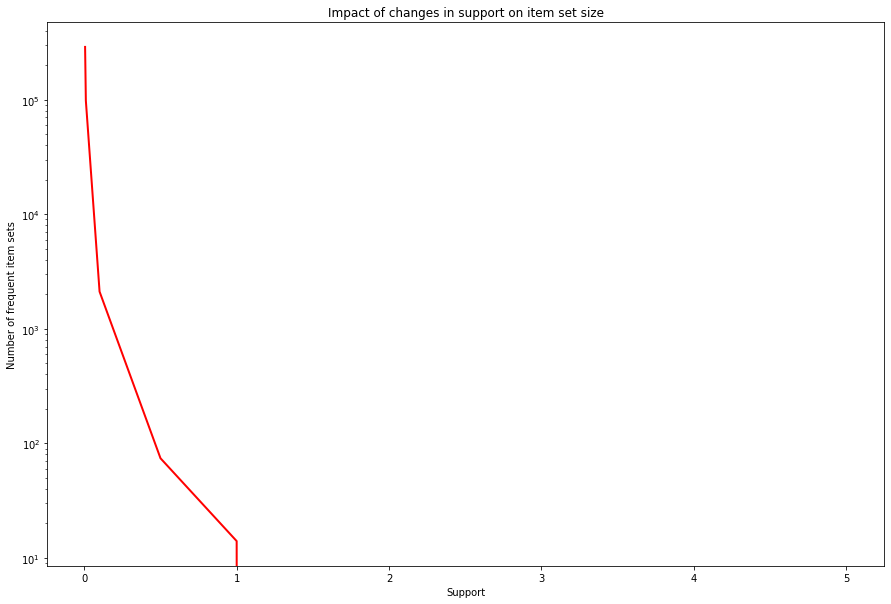

In [25]:
plt.plot(supps, fr_it_set_size, color='red', lw=2)

plt.xlabel('Support')
plt.ylabel('Number of frequent item sets')
plt.title('Impact of changes in support on item set size')
plt.yscale('log')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [26]:
print(supps)
print(fr_it_set_size)

[0.005, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
[289050, 98068, 2111, 74, 14, 0, 0]


### 3. Maximum length of a frequent set of items

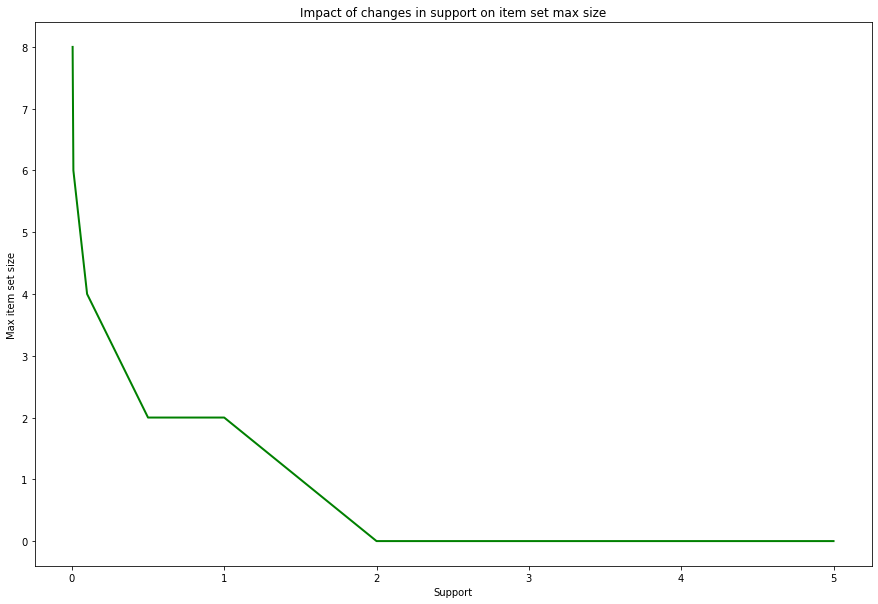

In [27]:
plt.plot(supps, fi_it_set_max_len, color='green', lw=2)

plt.xlabel('Support')
plt.ylabel('Max item set size')
plt.title('Impact of changes in support on item set max size')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### 4. Number of frequent item sets of different length

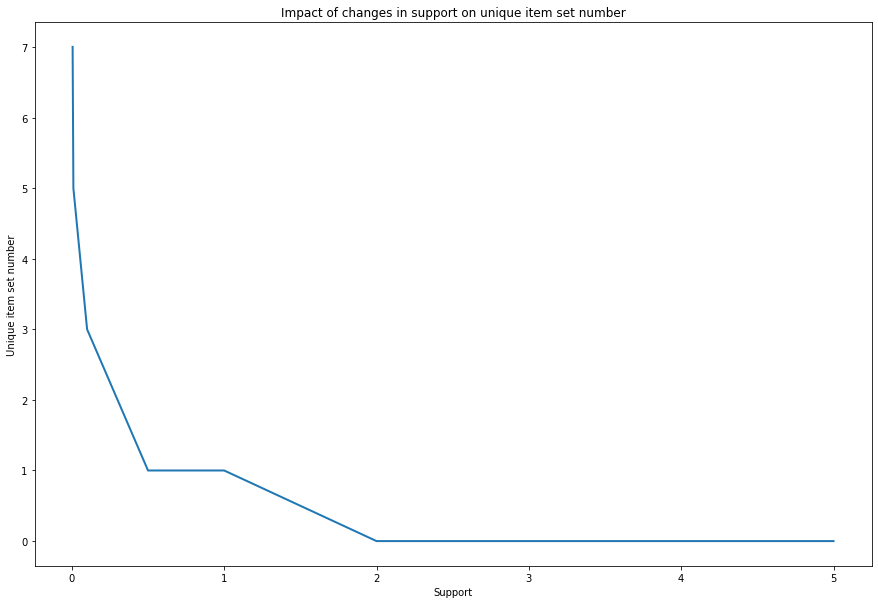

In [28]:
plt.plot(supps, num_of_unique_fr_it_set, lw=2)

plt.xlabel('Support')
plt.ylabel('Unique item set number')
plt.title('Impact of changes in support on unique item set number')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()